In [65]:
import pandas as pd
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('movies.dat', sep='::', header=None, names=mnames, engine='python')

In [109]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [110]:
import numpy as np

movies1 = movies
movies1.genres = movies1.genres.astype('str')
genre_list = movies1.genres.str.split('|')
genre_list.name = 'genres'
movies1 = movies1.drop('genres',axis=1).join(genre_list)
genres_sep = movies1.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
genres_sep.name = 'genre'
movies2 = movies.drop('genres', axis=1).join(genres_sep)
movies2.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's


In [92]:
#merged dataset seperated by genres
genres_seperated_data = pd.merge(pd.merge(ratings, users), movies2)

In [114]:
genres_seperated_data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genre
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [97]:
#Q1 An aggregate of the movie ratings for each particular genre
agg_ratings = genres_seperated_data.groupby('genre').agg({'rating':[np.mean]})
agg_ratings

,rating
,mean
genre,
Action,3.491185
Adventure,3.477257
Animation,3.684868
Children's,3.422035
Comedy,3.522099
Crime,3.708679
Documentary,3.933123
Drama,3.766332


In [98]:
#Q2 The top 5 highest ranked genre by women
mean_ratings = genres_seperated_data.pivot_table('rating',index='genre',columns='gender',aggfunc='mean')
top_women_ratings = mean_ratings.sort_values(by='F',ascending=False)
top_women_ratings[:5]

gender,F,M
genre,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Musical,3.809108,3.596332
Drama,3.765662,3.766589


In [99]:
#Q3 The top 5 highest ranked genre by men
top_men_ratings = mean_ratings.sort_values(by='M',ascending=False)
top_men_ratings[:5]

gender,F,M
genre,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Drama,3.765662,3.766589
Crime,3.689332,3.713720


In [112]:
#Q4 A breakdown of a movie’s ratings by age, use any movie of your choice:

#For last two questions, I will be using the original dataset, because merged dataset seperated by genres contains a lot of duplication for ratings
data = pd.merge(pd.merge(ratings, users), movies)

jumanji = data['title'] == 'Jumanji (1995)'
data[jumanji].groupby('age').agg({'rating':[np.size,np.mean]})


rating          
      size      mean
age                 
1       89  3.808989
18     541  3.737523
25    1000  3.702000
35     518  3.795367
45     218  3.940367
50     193  3.766839
56     113  3.911504

In [102]:
#Q5 A function that given a user id and movie id , returns a list of user ids for
#other users that rated the movie identified by the provided movie id with the same score
def findUserId(user_id, movie_id):
    rating = data[(data['movie_id'] == movie_id) & (data['user_id'] == user_id)]['rating']
    if len(rating) == 0:
        return pd.core.series.Series()
    res = data[(data['movie_id'] == movie_id) & (data['rating'] == rating[0]) & (data['user_id'] != user_id)]
    return res['user_id']

In [103]:
#Q6 Some other statistic, figure, aggregate, or plot that you created using this dataset,
#along with a short description of what interesting observations you derived from it.

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
mean_ratings

gender,F,M,diff
genre,,,
Action,3.490252,3.491386,0.001134
Adventure,3.512879,3.468125,-0.044753
Animation,3.744702,3.661335,-0.083367
Children's,3.572548,3.358961,-0.213586
Comedy,3.571938,3.503667,-0.068271
Crime,3.689332,3.713720,0.024388
Documentary,3.946392,3.928811,-0.017581
Drama,3.765662,3.766589,0.000927
Fantasy,3.513076,3.426603,-0.086473


In [104]:
#Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by men:
sorted_by_diff = mean_ratings.sort_values(by='diff', ascending=False)
sorted_by_diff[:10]

gender,F,M,diff
genre,,,
Western,3.551913,3.655120,0.103208
Film-Noir,4.018087,4.092254,0.074167
Crime,3.689332,3.713720,0.024388
Sci-Fi,3.450255,3.469952,0.019697
Horror,3.202870,3.217891,0.015021
Action,3.490252,3.491386,0.001134
Drama,3.765662,3.766589,0.000927
War,3.893138,3.893375,0.000237
Thriller,3.573360,3.569685,-0.003675


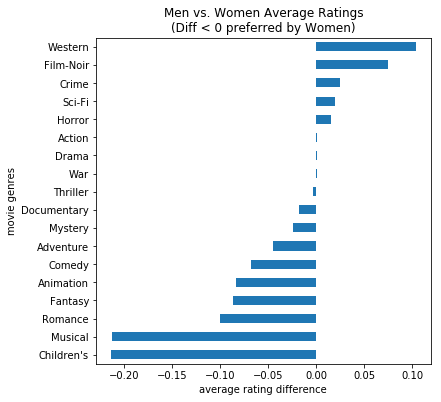

In [116]:
import matplotlib.pyplot as plt
disagreements = mean_ratings['diff']
disagreements.sort_values().plot(kind='barh',figsize=[6,6])
plt.title('Men vs. Women Average Ratings\n(Diff < 0 = preferred by Women)')
plt.ylabel('movie genres')
plt.xlabel('average rating difference');
plt.show()

In [118]:
print("As we observe the graph above, men and women gave similar ratings for genres like Action, Drama ,and War. However, men favors Western and Film-Noir movies more, while women favors Musical, Children's movies, romance, fantasy, and animation. From my own perspectives, it makes a lot sense to me that women favors children's movie, romance and animation movies. Yet, I don't understand why women and men rate war movies similarly")



As we observe the graph above, men and women gave similar ratings for genres like Action, Drama ,and War. However, men favors Western and Film-Noir movies more, while women favors Musical, Children's movies, romance, fantasy, and animation. From my own perspectives, it makes a lot sense to me that women favors children's movie, romance and animation movies. Yet, I don't understand why women and men rate war movies similarly
